In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('Salaries.csv.crdownload')

# Data Exploration

In [4]:
df.head(5)

Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.00  400184.25       NaN  567595.43         567595.43   
1  155966.02    245131.88  137811.38       NaN  538909.28         538909.28   
2  212739.13    106088.18   16452.60       NaN  335279.91         335279.91   
3   77916.00     56120.71  198306.90       NaN  332343.61         332343.61   
4  134401.60      9737.00  182234.59       NaN  326373.19         326373.19   

     Year  Notes         Agency  Status  
0  2011.0    NaN  San Francisco     NaN  
1  2011.0    NaN  San Francisco     NaN  
2  2011.0    NaN  San Francisco     NaN  
3  2011.0    NaN  San Francisco     NaN  
4  2011.0    NaN  San Francisco     NaN

In [7]:
df.shape

(19923, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19923 entries, 0 to 19922
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                19923 non-null  int64  
 1   EmployeeName      19923 non-null  object 
 2   JobTitle          19922 non-null  object 
 3   BasePay           19922 non-null  float64
 4   OvertimePay       19922 non-null  float64
 5   OtherPay          19922 non-null  float64
 6   Benefits          0 non-null      float64
 7   TotalPay          19922 non-null  float64
 8   TotalPayBenefits  19922 non-null  float64
 9   Year              19922 non-null  float64
 10  Notes             0 non-null      float64
 11  Agency            19922 non-null  object 
 12  Status            0 non-null      float64
dtypes: float64(9), int64(1), object(3)
memory usage: 2.0+ MB


cheak duplicated

In [13]:
df.duplicated().sum()

0

cheak missing valus 

In [9]:
df.isnull().sum()

Id                      0
EmployeeName            0
JobTitle                1
BasePay                 1
OvertimePay             1
OtherPay                1
Benefits            19923
TotalPay                1
TotalPayBenefits        1
Year                    1
Notes               19923
Agency                  1
Status              19923
dtype: int64

# Data Cleaning

In [61]:
df.isnull().sum() / df.shape[0] * 100

Id                    0.000000
EmployeeName          0.000000
JobTitle              0.005019
BasePay               0.005019
OvertimePay           0.005019
OtherPay              0.005019
Benefits            100.000000
TotalPay              0.005019
TotalPayBenefits      0.005019
Year                  0.005019
Notes               100.000000
Agency                0.005019
Status              100.000000
dtype: float64

we can't use columns with 100% of missing values , so we'll drope it

In [5]:
df.drop(['Benefits','Notes','Status'], inplace = True, axis = 1)


In [52]:
df.shape

(19922, 10)

In [32]:
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            1
BasePay             1
OvertimePay         1
OtherPay            1
TotalPay            1
TotalPayBenefits    1
Year                1
Agency              1
dtype: int64

In [40]:
df[df['JobTitle'].isnull()]

Id     EmployeeName JobTitle  BasePay  OvertimePay  OtherPay  \
19922  19923  DIMITRI SHIKALO      NaN      NaN          NaN       NaN   

       Benefits  TotalPay  TotalPayBenefits  Year  Notes Agency  Status  
19922       NaN       NaN               NaN   NaN    NaN    NaN     NaN

In [6]:
df = df.dropna(subset =['JobTitle'] )

In [53]:
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

# Descriptive Statistics

In [57]:
df.describe()

Id        BasePay    OvertimePay       OtherPay  \
count  19922.000000   19922.000000   19922.000000   19922.000000   
mean    9961.500000   92255.348969    7530.573242    5648.998218   
std     5751.130367   28327.434413   13274.180963   10020.889674   
min        1.000000       0.000000       0.000000       0.000000   
25%     4981.250000   69623.660000       0.000000     115.100000   
50%     9961.500000   86840.000000    1802.030000    2200.000000   
75%    14941.750000  107117.437500    9335.012500    7558.552500   
max    19922.000000  294580.020000  245131.880000  400184.250000   

            TotalPay  TotalPayBenefits     Year  
count   19922.000000      19922.000000  19922.0  
mean   105434.920430     105434.920430   2011.0  
std     34346.626377      34346.626377      0.0  
min     63534.970000      63534.970000   2011.0  
25%     78304.182500      78304.182500   2011.0  
50%     97414.115000      97414.115000   2011.0  
75%    124353.317500     124353.317500   2011.0  
max    567595.430000     567595.430000   2011.0

In [9]:
df.describe(include=['O'])

EmployeeName          JobTitle         Agency
count         19922             19922          19922
unique        19401               870              1
top       KEVIN LEE  TRANSIT OPERATOR  San Francisco
freq              8              1463          19922

the average of total pay

In [6]:
df['TotalPay'].mean()

105434.92042967633

the highest & lowest total pay

In [9]:
df['TotalPay'].max()

567595.43

In [10]:
df['TotalPay'].min()

63534.97

the top 5 jops

In [24]:
df['JobTitle'].value_counts().head(5)

TRANSIT OPERATOR      1463
REGISTERED NURSE      1082
FIREFIGHTER            744
POLICE OFFICER III     743
DEPUTY SHERIFF         653
Name: JobTitle, dtype: int64

#  Visualization

In [62]:
px.histogram(df['TotalPay'])

In [53]:
df_salary = df[(df['TotalPay'] > 63534.970000 ) & (df['TotalPay'] < 400000)]

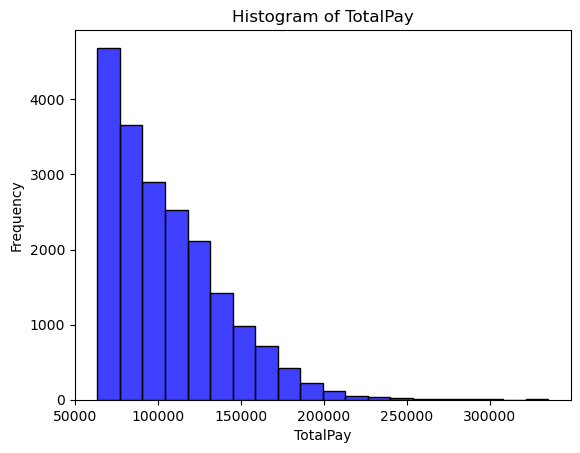

In [54]:
sns.histplot(df_salary ['TotalPay'], bins=20, kde=False, color='blue')
plt.title('Histogram of TotalPay')
plt.xlabel('TotalPay')
plt.ylabel('Frequency')
plt.show()

In [55]:
df_agg = df.groupby('JobTitle').agg({
    'Id' : 'count'
}).reset_index()

In [56]:
px.pie(df_agg, names = 'JobTitle' , values = 'Id')

In [57]:
df.JobTitle = df.JobTitle.str.lower()
criteria = df.JobTitle.value_counts()>500
jobtitlelist = df.JobTitle.value_counts()[criteria].reset_index()
dff = df[['JobTitle', 'TotalPayBenefits']]
dff = dff[dff.JobTitle.isin(jobtitlelist['index'])]
pivoted_data = df.pivot_table('TotalPayBenefits', index='JobTitle' , aggfunc=np.mean)
sorted_salaries = pivoted_data.sort_values(by='TotalPayBenefits', ascending= False)
print(sorted_salaries[:10])

                                                TotalPayBenefits
JobTitle                                                        
general manager-metropolitan transit authority        399211.275
deputy director of investments                        307899.460
chief of department, (fire department)                302377.730
deputy chief of department,(fire department)          279359.560
executive contract employee                           277438.840
chief of police                                       267992.590
administrator, sfgh medical center                    257124.440
deputy chief iii (police department)                  250026.488
mayor                                                 249375.020
district attorney                                     234848.110


<AxesSubplot:xlabel='JobTitle'>

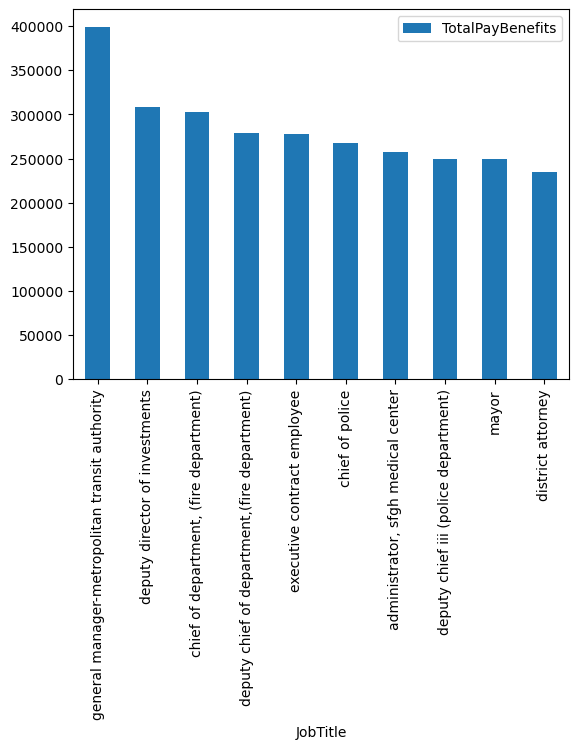

In [60]:
sorted_salaries[:10].plot.bar()

# Grouped Analysis

In [51]:
jobtitlelist = df.JobTitle.value_counts()
data_10jobtitle = df[df.JobTitle.isin(jobtitlelist.index)]
avgsalary_10jobtitle=data_10jobtitle.groupby(by=data_10jobtitle.JobTitle).TotalPay.mean()
print(avgsalary_10jobtitle)

JobTitle
accountant                                 65308.660000
acupuncturist                              67594.400000
administrative analyst                     73172.717424
administrative analyst ii                  75585.820000
administrative analyst iii                 92698.515000
                                              ...      
wire rope cable maintenance supervisor    199628.970000
worker's compensation adjuster             74648.163500
worker's compensation supervisor i         91020.726000
x-ray laboratory aide                      68849.223750
zoo curator                                66686.560000
Name: TotalPay, Length: 870, dtype: float64


# Correlation Analysis

In [31]:
df.head(5)

Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay   TotalPay  TotalPayBenefits    Year  \
0  167411.18         0.00  400184.25  567595.43         567595.43  2011.0   
1  155966.02    245131.88  137811.38  538909.28         538909.28  2011.0   
2  212739.13    106088.18   16452.60  335279.91         335279.91  2011.0   
3   77916.00     56120.71  198306.90  332343.61         332343.61  2011.0   
4  134401.60      9737.00  182234.59  326373.19         326373.19  2011.0   

          Agency  
0  San Francisco  
1  San Francisco  
2  San Francisco  
3  San Francisco  
4  San Francisco

In [32]:
df['EmployeeName'] = pd.factorize(df['EmployeeName'])[0] + 1
df['JobTitle'] = pd.factorize(df['JobTitle'])[0] + 1
df['BasePay'] = pd.factorize(df['BasePay'])[0] + 1
df['OvertimePay'] = pd.factorize(df['OvertimePay'])[0] + 1
df['OtherPay'] = pd.factorize(df['OtherPay'])[0] + 1
df['TotalPayBenefits'] = pd.factorize(df['TotalPayBenefits'])[0] + 1
df['Year'] = pd.factorize(df['Year'])[0] + 1
df['Agency'] = pd.factorize(df['Agency'])[0] + 1
corr = df.corr()
corr['TotalPay'].sort_values(ascending=False)


TotalPay            1.000000
OvertimePay        -0.399858
OtherPay           -0.518061
JobTitle           -0.652016
BasePay            -0.869406
EmployeeName       -0.909921
Id                 -0.932111
TotalPayBenefits   -0.932638
Year                     NaN
Agency                   NaN
Name: TotalPay, dtype: float64

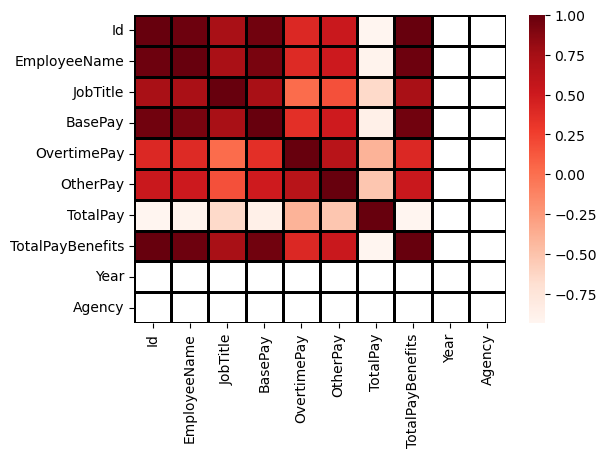

In [35]:
fig = plt.figure(figsize = (6, 4))
data_ploting = df.corr(method= 'pearson')
sns.heatmap(data_ploting, cmap='Reds', linecolor='black', linewidths= 2 )
plt.show()

<Figure size 600x400 with 0 Axes>

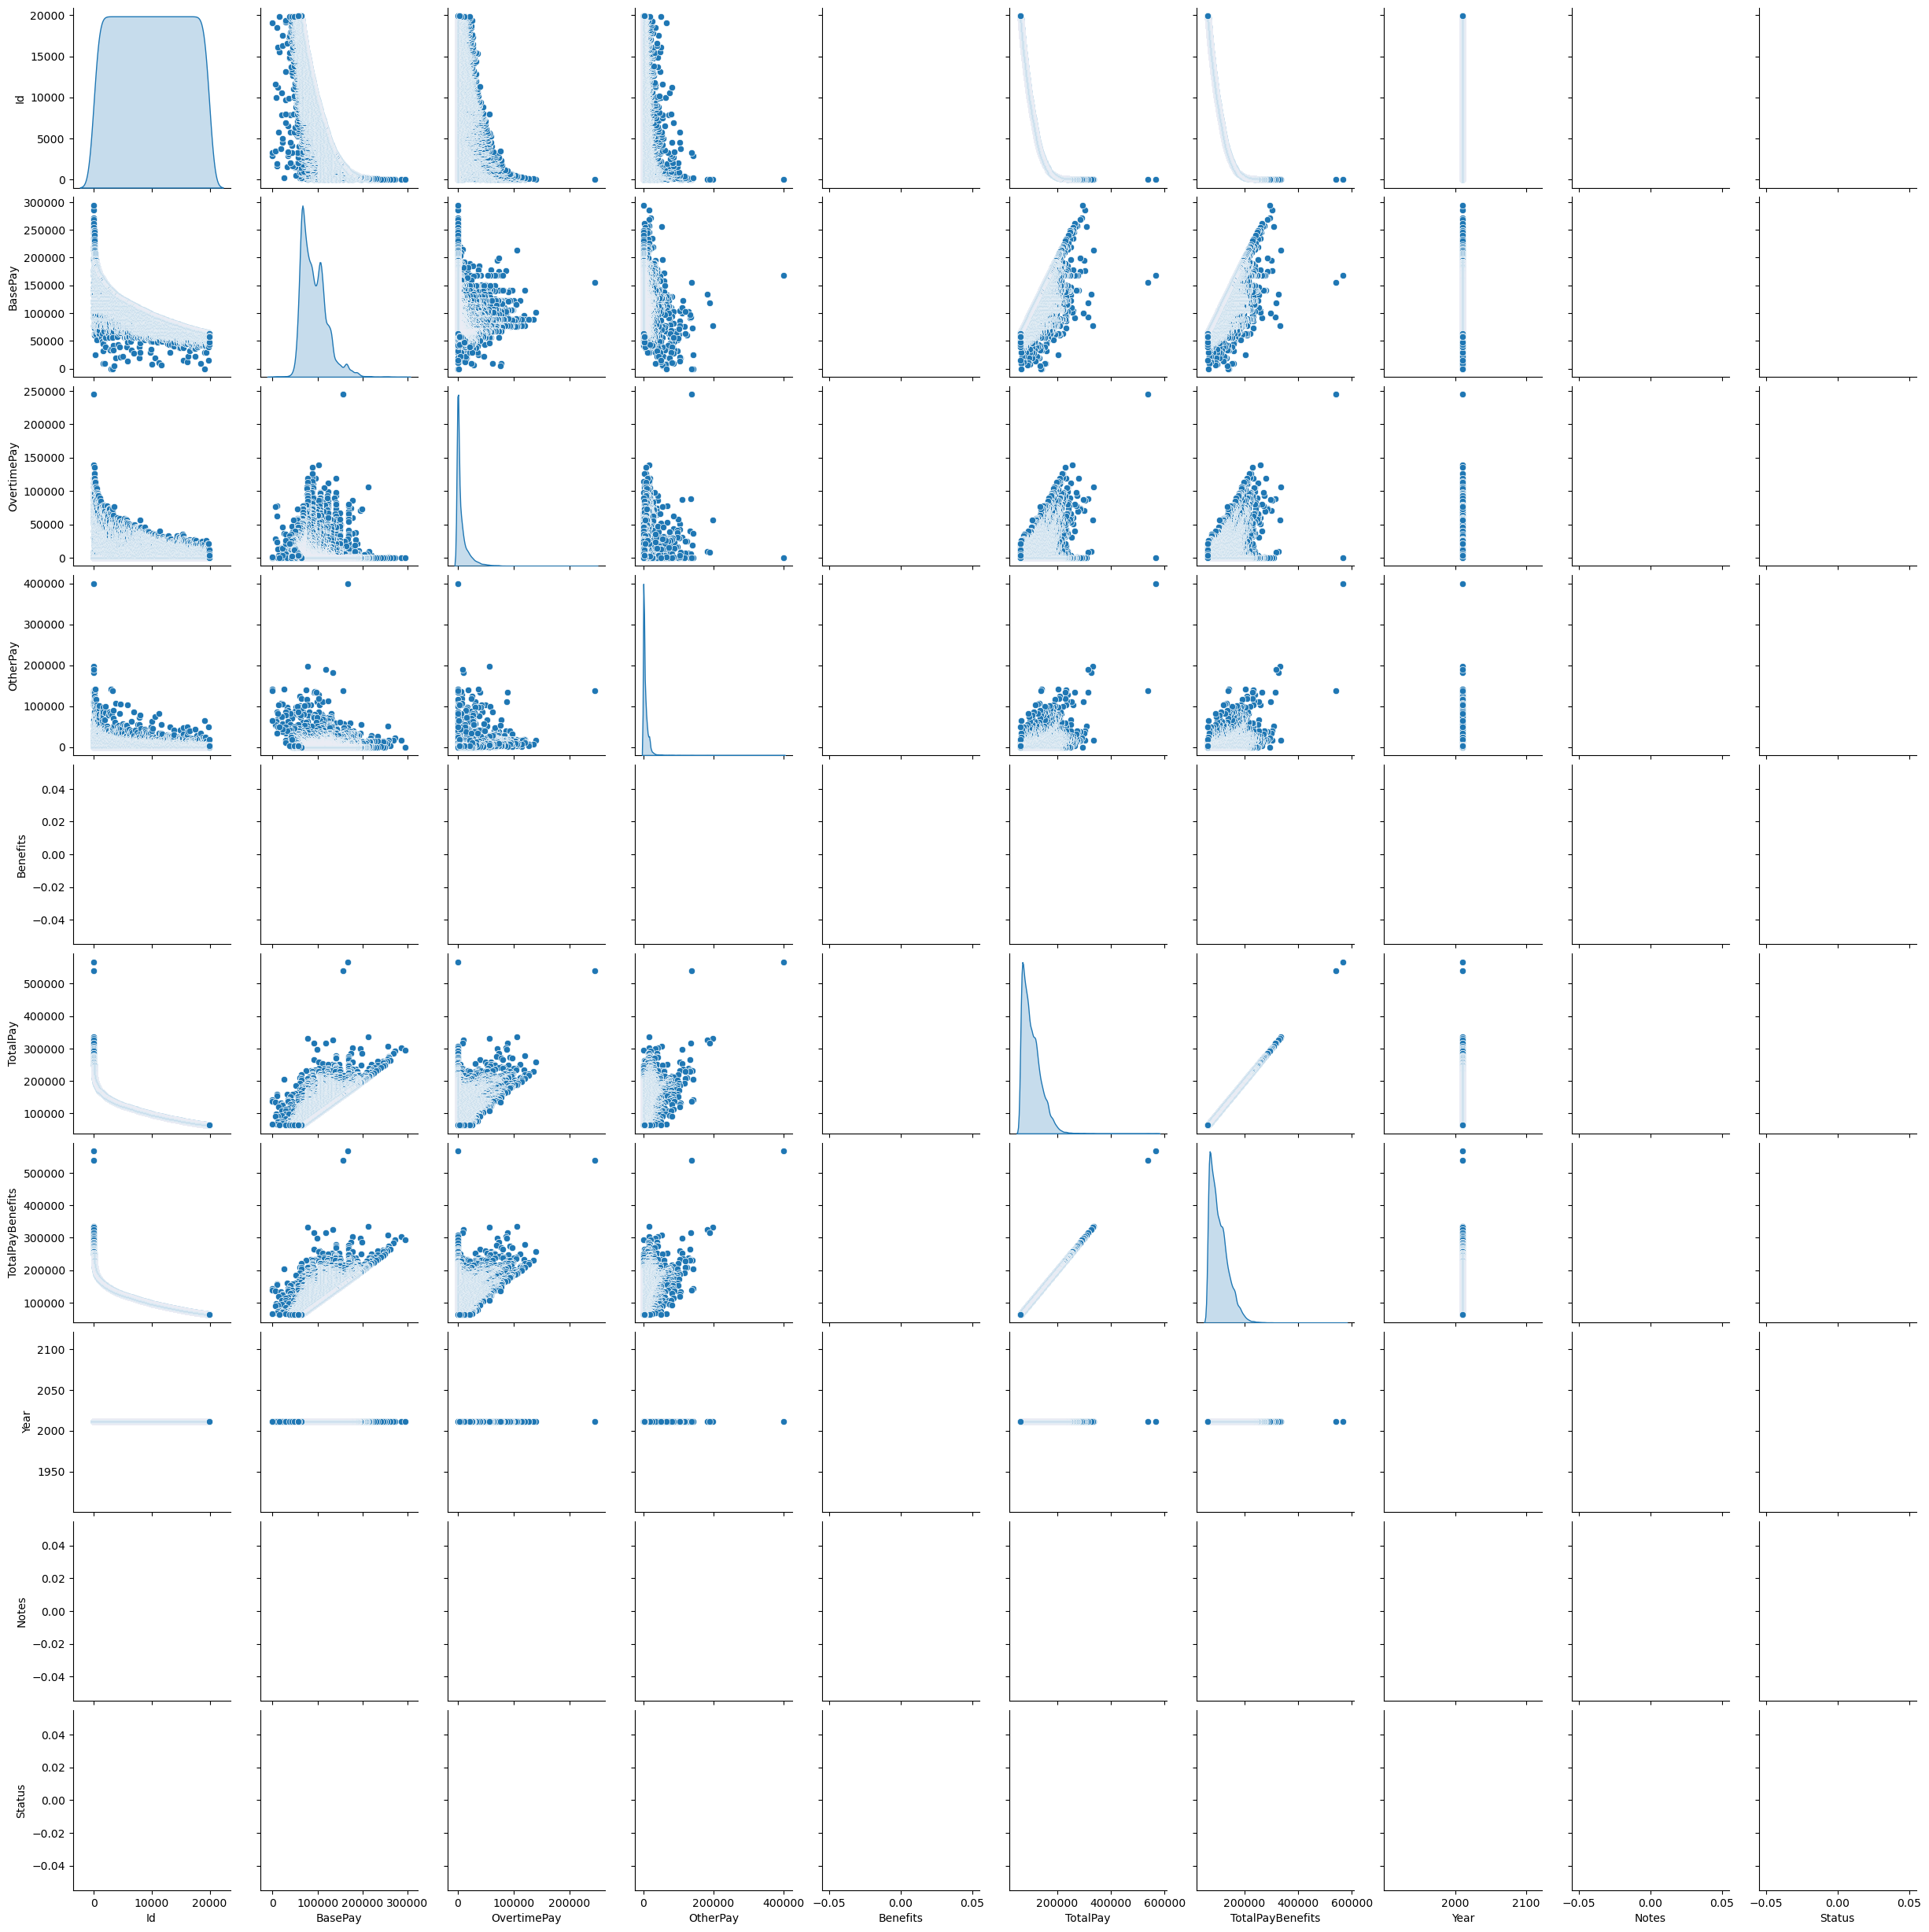

In [64]:
fig = plt.figure(figsize = (6, 4))
sns.pairplot(df,diag_kind='kde')